In [1]:
import pandas as pd
import numpy as np

data_tennis = pd.read_csv("../bases/tennis.csv", sep = ",")

 - clima
 - temperatura
 - umidade
 - ventoso
 - jogar tênis

In [2]:
data_tennis

,clima,temperatura,humedad,ventoso,jugar_tenis
0,soleado,caluroso,alta,no,no
1,soleado,caluroso,alta,si,no
2,nublado,caluroso,alta,no,si
3,lluvioso,templado,alta,no,si
4,lluvioso,frio,normal,no,si
5,lluvioso,frio,normal,si,no
6,nublado,frio,normal,si,si
7,soleado,templado,alta,no,no
8,soleado,frio,normal,no,si
9,lluvioso,templado,normal,no,si


In [3]:
#Shape
print(data_tennis.shape)

(14, 5)


In [4]:
#verificar missing 
data_tennis.count()

clima          14
temperatura    14
humedad        14
ventoso        14
jugar_tenis    14
dtype: int64

In [5]:
#Analisamos o tipo de dados
data_tennis.dtypes

clima          object
temperatura    object
humedad        object
ventoso        object
jugar_tenis    object
dtype: object

In [6]:
#Começamos com a preparação dos nossos dados
data_tennis_dummy = pd.get_dummies(data_tennis, drop_first=True)

In [7]:
#Vamos ver o que aconteceu
data_tennis_dummy

,clima_nublado,clima_soleado,temperatura_frio,temperatura_templado,humedad_normal,ventoso_si,jugar_tenis_si
0,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1
3,0,0,0,1,0,0,1
4,0,0,1,0,1,0,1
5,0,0,1,0,1,1,0
6,1,0,1,0,1,1,1
7,0,1,0,1,0,0,0
8,0,1,1,0,1,0,1
9,0,0,0,1,1,0,1


In [8]:
#Separamos os dados de entrada dos de saída
X = data_tennis_dummy.drop('jugar_tenis_si', axis=1) #excluo a variável a ser prevista do meu conjunto de dados
y = data_tennis_dummy.jugar_tenis_si #Defina o alvo

In [9]:
from sklearn.model_selection import train_test_split #Importamos a biblioteca para separar em treinar e testar
#ficar com 30% para teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [27]:
from sklearn.tree import DecisionTreeClassifier #Importamos o modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Criando modelo

In [28]:
#Treinando modelo
tree.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=2, random_state=42)

In [29]:
y_train_pred = tree.predict(X_train) #Predicao treino
y_test_pred = tree.predict(X_test) #Predicao teste

In [30]:
from sklearn.metrics import accuracy_score

#Cálculo de acuracia no treino
train_accuracy = accuracy_score(y_train, y_train_pred)

#Cálculo de acuracia no teste
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de acertos no conjunto de treinamento:', train_accuracy)
print('% de acertos no conjunto de teste:',test_accuracy)

% de acertos no conjunto de treinamento: 0.8888888888888888
% de acertos no conjunto de teste: 0.4


**Insight**: o que interpretamos em nossa árvore de decisão?

R: Nosso modelo está realizando "Overfitting", o que podemos fazer para evitá-lo?

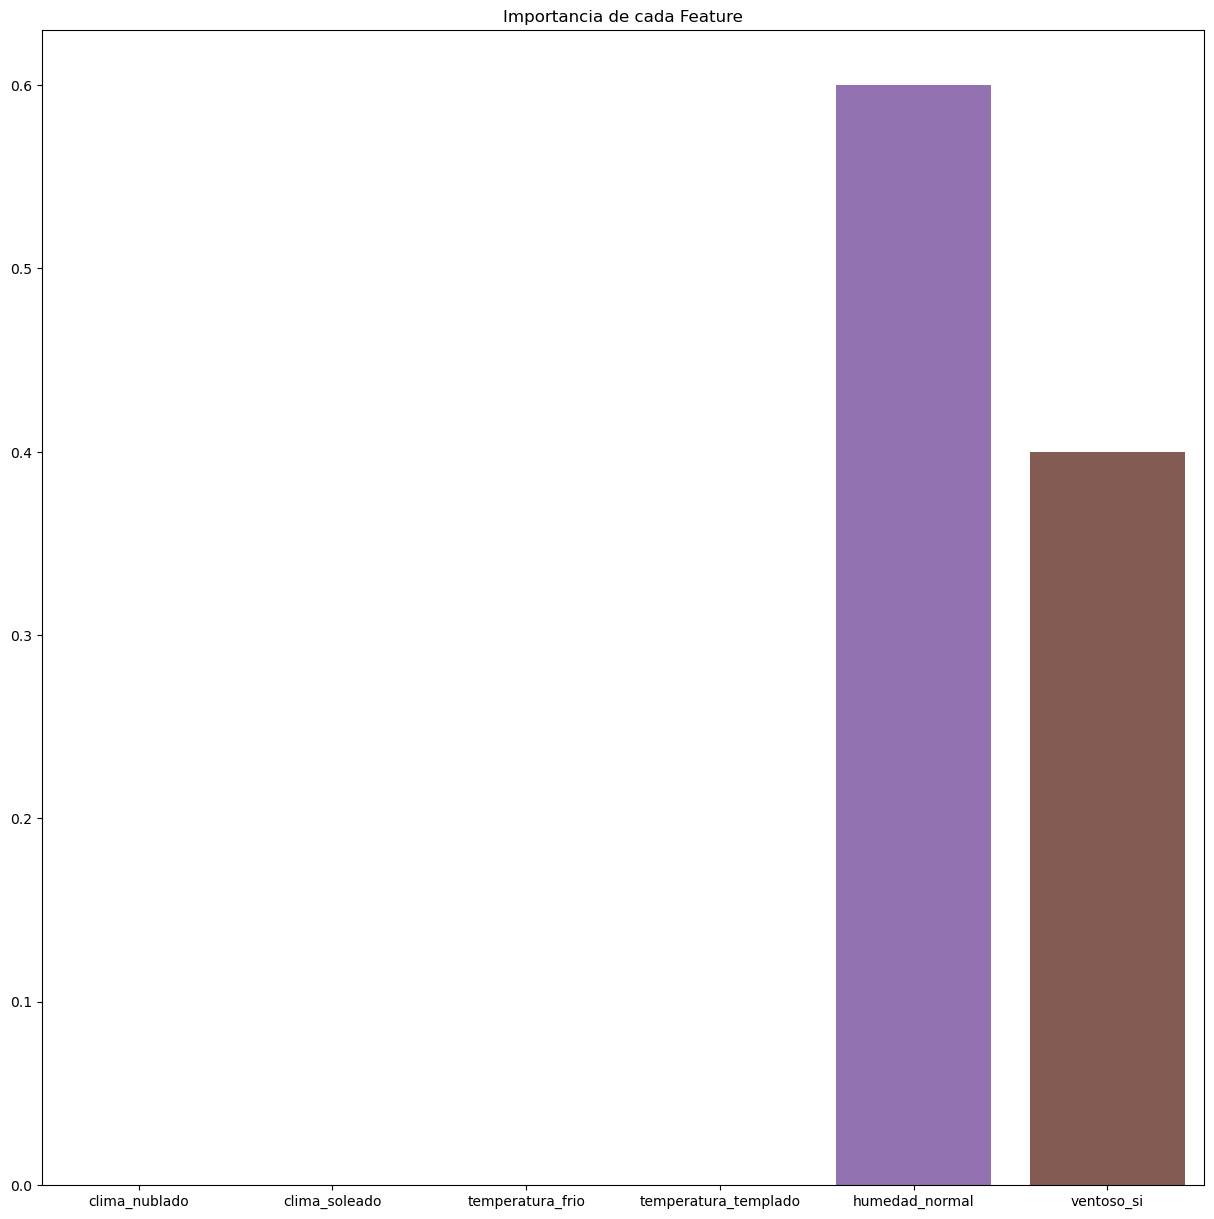

In [31]:
#Importância das variáveis

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns, y=importances)
plt.title('Importancia de cada Feature')
plt.show()